***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [75]:
dados = pd.read_csv('dados.csv', sep=',')
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Visualize o conteúdo do DataFrame

In [76]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [77]:
cl = [0, 2*788, 5*788, 15*788, 25*788, max(dados.Renda)]
cl

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [78]:
lb = ['E', 'D', 'C', 'B', 'A']
lb

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [79]:
freq = pd.value_counts(
    pd.cut(x = dados.Renda,
           labels = lb, 
           bins = cl,
           include_lowest=True)
)
freq = pd.DataFrame(freq)
freq.index.names = ['Classe']
freq

,Renda
Classe,
E,49755
D,18602
C,7241
B,822
A,420


### 4º Construir a coluna de percentuais

In [80]:
per = (pd.value_counts(
    pd.cut(x = dados.Renda,
           labels = lb, 
           bins = cl,
           include_lowest=True),
        normalize = True
)*100).round(1)
per = pd.DataFrame(per)
per.index.names = ['Classe']
per

,Renda
Classe,
E,64.8
D,24.2
C,9.4
B,1.1
A,0.5


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [81]:
tabela = freq.merge(per, how = 'left', on= 'Classe')
tabela.columns = ['Frequencia', 'Percentual']
tabela.reset_index(inplace = True)
tabela


,Classe,Frequencia,Percentual
0,E,49755,64.8
1,D,18602,24.2
2,C,7241,9.4
3,B,822,1.1
4,A,420,0.5


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

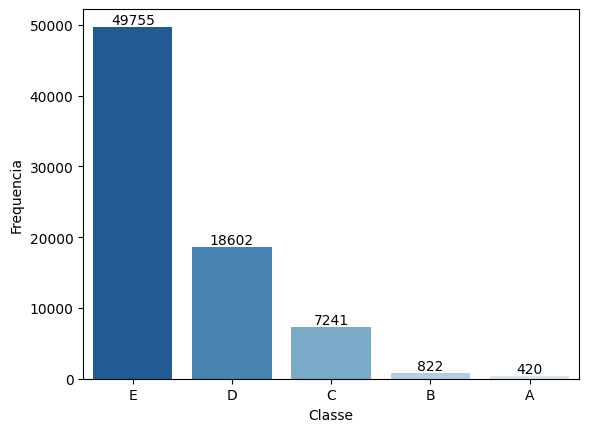

In [82]:
grafico = sns.barplot(x = tabela.Classe, 
            y = tabela.Frequencia, 
            palette = 'Blues_r')
for i in grafico.containers:
    grafico.bar_label(i,)

> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<AxesSubplot: xlabel='Idade', ylabel='Count'>

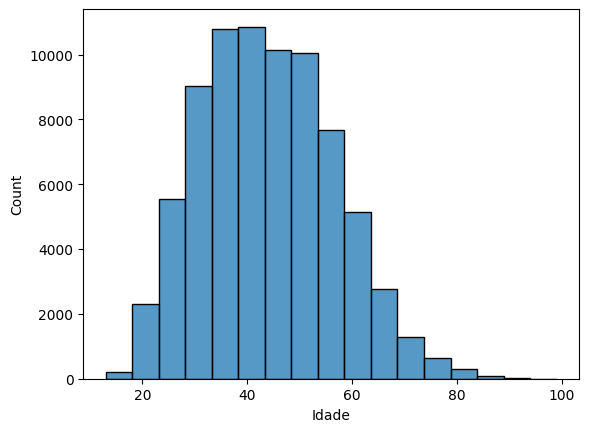

In [83]:
dados.head()
sns.histplot(dados.Idade, bins = 17)

<AxesSubplot: xlabel='Altura', ylabel='Count'>

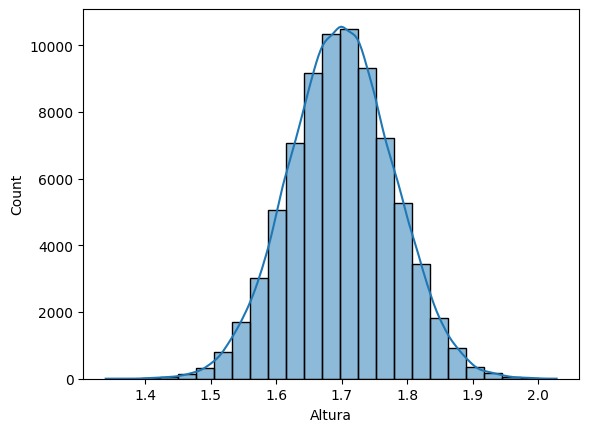

In [84]:
sns.histplot(dados.Altura, bins = 25, kde=True)

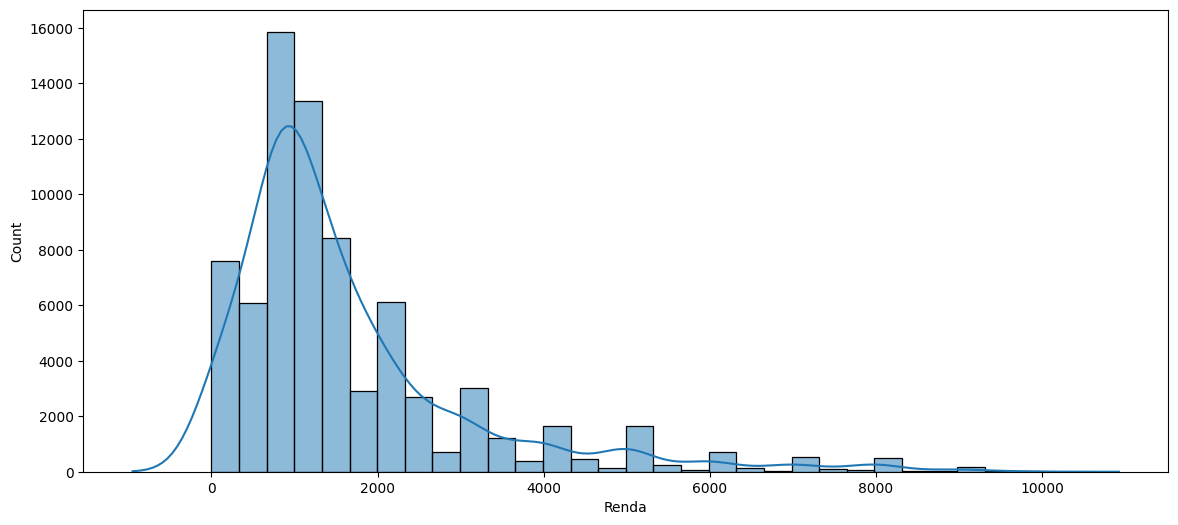

In [85]:
plot = sns.histplot(dados.query('Renda<10000')['Renda'], 
             bins=30,
             kde=True,
             kde_kws= {'cut' : 3, 'bw_adjust':2})
plot.figure.set_size_inches(14,6)


> ### Conclusões

O gráfico de Idade possui assimetria a direita, o que é compreensível visto que as Idades coletadas são de pessoas maiores de 18 anos (chefe da casa).
A renda possui uma assimetria a direita visto que existe renda negativa

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

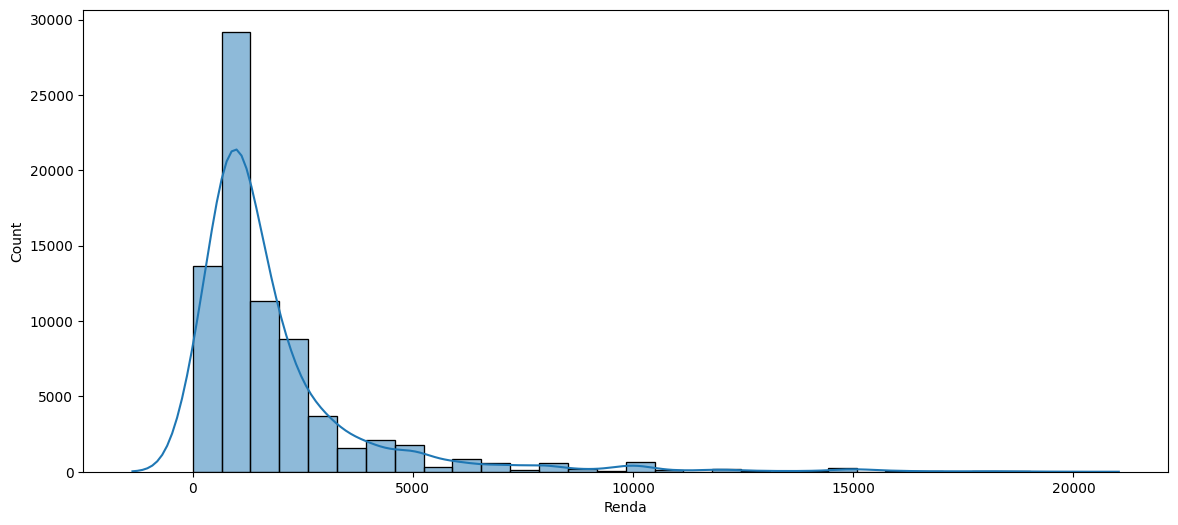

In [86]:
grafico = sns.histplot(dados.query('Renda<20000')['Renda'], 
             bins=30,
             kde=True,
             kde_kws= {'cut' : 3, 'bw_adjust':2})
grafico.figure.set_size_inches(14,6)


### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [87]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [88]:
classificacao = (pd.crosstab(dados.Sexo, 
                             dados.Cor, 
                             normalize=True)*100).round(1).rename(index=sexo, 
                                                                columns=cor)
classificacao
#classificacao.rename(index=sexo, 
 #                    columns=cor)


Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.3,28.9,7.2,0.3,32.6
Feminino,0.1,12.5,3.8,0.2,14.1


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [89]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [90]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [91]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [92]:
dados.Renda.mad()

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_7352\1842753368.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dados.Renda.mad()


1526.4951371638058

### Obtenha a variância

In [93]:

dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [94]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [95]:
resumo = pd.crosstab(dados.Cor,
                     dados.Sexo,
                     aggfunc= {('Media', 'mean'), ('Mediana','median'), ('Maximo','max')} ,
                     values=dados.Renda
                     ).rename(index=cor,columns = sexo)
resumo

Maximo                 Media                Mediana         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [96]:
resumo = pd.crosstab(dados.Cor,
                     dados.Sexo,
                     aggfunc= {('Desvio Medio Absoluto', 'mad'), ('Variancia','var'), ('Desvio Padrão','std')} ,
                     values=dados.Renda
                     ).rename(index=cor,columns = sexo).round(2)
resumo

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_7352\1681815483.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  resumo = pd.crosstab(dados.Cor,
C:\Users\PICHAU\AppData\Local\Temp\ipykernel_7352\1681815483.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  resumo = pd.crosstab(dados.Cor,
C:\Users\PICHAU\AppData\Local\Temp\ipykernel_7352\1681815483.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  resumo = pd.crosstab(dados.Cor,
C:\Users\PICHAU\AppData\Local\Temp\ipykernel_7352\1681815483.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mea

Desvio Medio Absoluto          Desvio Padrão              Variancia  \
Sexo                 Masculino Feminino     Masculino  Feminino    Masculino   
Cor                                                                            
Indígena                798.91  3007.89       1204.09  11957.50   1449841.13   
Branca                 2261.01  1670.97       4750.79   3251.01  22570023.41   
Preta                   975.60   705.45       1936.31   1349.80   3749293.59   
Amarela                3709.60  2549.15       5740.82   3731.17  32957069.62   
Parda                  1125.83   811.58       2312.09   1596.23   5345747.15   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot: xlabel='Renda', ylabel='Cor'>

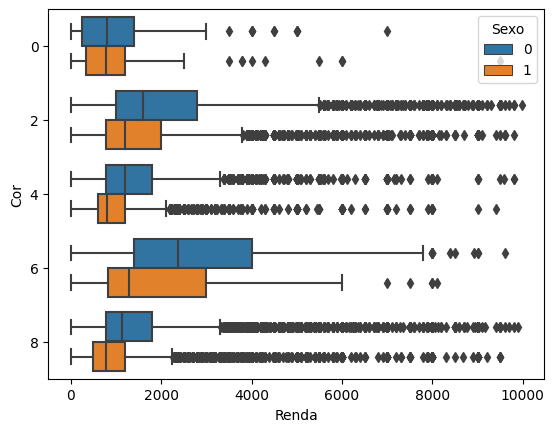

In [117]:
#dados.rename({'Cor':cor})
sns.boxplot(data = dados.query('Renda < 10000'),x = 'Renda', y= 'Cor', orient= 'h', hue = 'Sexo')


> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [98]:
from scipy import stats
stats.percentileofscore(dados.Renda, score= 788, kind= 'weak')


28.867777199375325

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [99]:
dados.Renda.quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [100]:
table = pd.crosstab(dados['Anos de Estudo'],
                    dados.Sexo,
                    values = dados.Renda,
                    aggfunc= {('Media', 'mean'), ('Mediana', 'median'), ('Maximo', 'max'), ('Desvio Padrão', 'std')}
                    ).rename(index = anos_de_estudo, columns = sexo)
table

Desvio Padrão                 Maximo           \
Sexo                               Masculino     Feminino Masculino Feminino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   1023.904884   639.311534     30000    10000   
1 ano                            1331.950552   425.291842     30000     2000   
2 anos                           1435.173827   498.234168     40000     4000   
3 anos                           2143.800133   424.124446     80000     3500   
4 anos                           1419.821787   629.553397     50000    10000   
5 anos                           1484.650587   635.782641     35000     8000   
6 anos                           1476.628602   574.547028     25000     6000   
7 anos                           1419.708673   602.038029     40000     9000   
8 anos                           1515.583715   896.781213     30000    18000   
9 anos                           2137.664774   973.221652     60000    20000   
10 anos                          2078.609734   620.611907     45000     6000   
11 anos                          2676.538942  1819.040417    200000   100000   
12 anos                          2268.081538  4851.833513     30000   120000   
13 anos                          2797.116800  2053.789771     25000    20000   
14 anos                          3987.214974  2064.083336     50000    20000   
15 anos ou mais                  7447.613594  4212.770709    200000   100000   
Não determinados                  979.648745   459.985964      7000     3000   

                                      Media                Mediana           
Sexo                              Masculino     Feminino Masculino Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano   799.494638   516.201748     700.0    390.0  
1 ano                            895.629047   492.771987     788.0    400.0  
2 anos                           931.178986   529.911638     788.0    450.0  
3 anos                          1109.203862   546.853916     800.0    500.0  
4 anos                          1302.329283   704.279111    1000.0    788.0  
5 anos                          1338.653218   781.389776    1045.0    788.0  
6 anos                          1448.875419   833.732824    1200.0    788.0  
7 anos                          1465.497940   830.751004    1200.0    788.0  
8 anos                          1639.396667   933.615351    1300.0    800.0  
9 anos                          1508.038850   868.021700    1200.0    788.0  
10 anos                         1731.270847   925.919225    1218.0    800.0  
11 anos                         2117.060504  1286.790889    1500.0   1000.0  
12 anos                         2470.330776  1682.313725    1800.0   1200.0  
13 anos                         3195.099154  1911.730047    2400.0   1300.0  
14 anos                         3706.620269  2226.460457    2500.0   1600.0  
15 anos ou mais                 6134.279790  3899.513231    4000.0   2800.0  
Não determinados                1295.761905   798.174419    1200.0    788.0

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

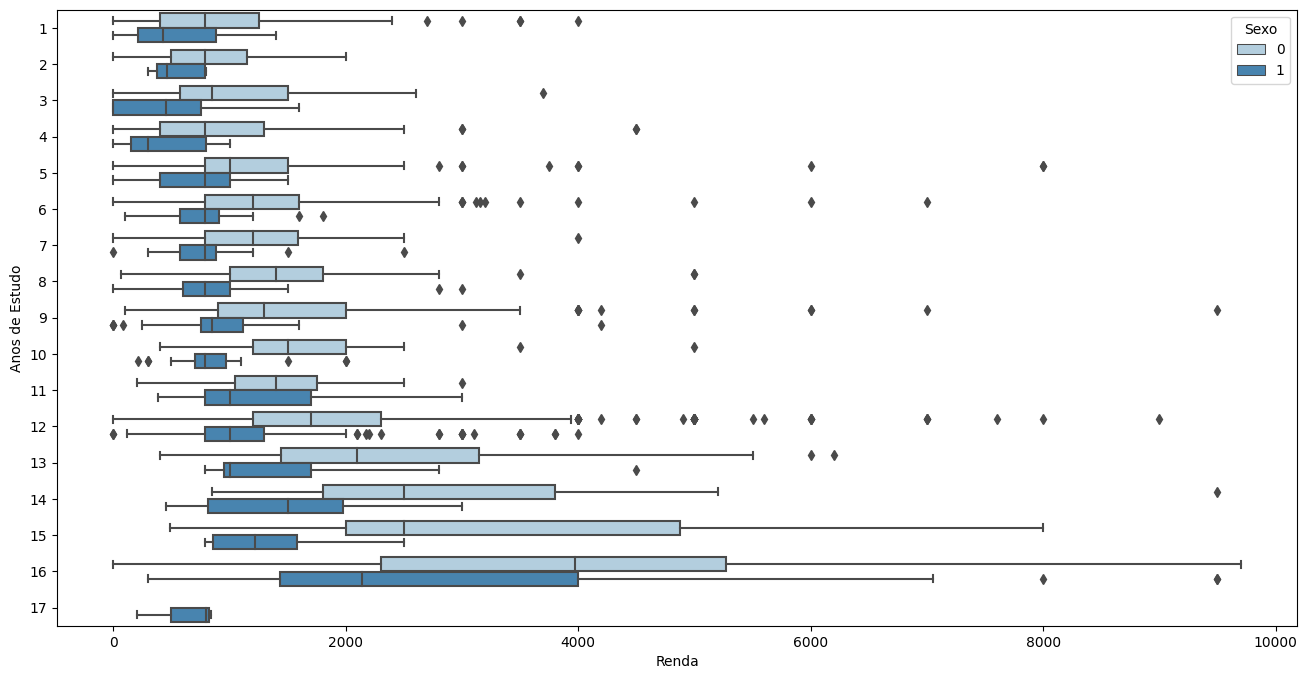

In [130]:
plt.figure(figsize = (16,8))
#graf1 = sns.boxplot(data = dados.query('Renda < 10000'),x = 'Renda', y= 'Anos de Estudo', orient= 'h', hue = 'Sexo', palette='Blues')
graf1 = sns.boxplot(data = dados.query('Renda < 10000 and Idade==40'),x = 'Renda', y= 'Anos de Estudo', orient= 'h', hue = 'Sexo', palette='Blues')
#graf3 = sns.boxplot(data = dados.query('Renda < 10000 and Idade==50'),x = 'Renda', y= 'Anos de Estudo', orient= 'h', hue = 'Sexo', palette='Blues')
#print(graf2)
#print(graf3)

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [133]:
dados.groupby(dados.UF).agg({'Renda': [('Media', 'mean'),('Mediana','median'), ('Maximo', 'max'), ('Desvio Padrao','std')]})

Renda                              
          Media Mediana  Maximo Desvio Padrao
UF                                           
11  1789.761223  1200.0   50000   2406.161161
12  1506.091782   900.0   30000   2276.233415
13  1445.130100   900.0   22000   1757.935591
14  1783.588889  1000.0   20000   2079.659238
15  1399.076871   850.0   50000   2053.779555
16  1861.353516  1200.0   15580   2020.688632
17  1771.094946  1000.0   60000   2934.590741
21  1019.432009   700.0   30000   1887.816905
22  1074.550784   750.0   40000   2373.355726
23  1255.403692   789.0   25000   1821.963536
24  1344.721480   800.0   15500   1651.805500
25  1293.370487   788.0   30000   1950.272431
26  1527.079319   900.0   50000   2389.622497
27  1144.552602   788.0   11000   1237.856197
28  1109.111111   788.0   16000   1478.997878
29  1429.645094   800.0  200000   3507.917248
31  2056.432084  1200.0  100000   3584.721547
32  2026.383852  1274.0  100000   3513.846868
33  2496.403168  1400.0  200000   5214.583518
35  2638.104986  1600.0   80000   3503.777366
41  2493.870753  1500.0  200000   4302.937995
42  2470.854945  1800.0   80000   3137.651112
43  2315.158336  1500.0   35000   2913.335783
50  2262.604167  1500.0   42000   3031.419122
51  2130.652778  1500.0   35000   2542.630178
52  1994.580794  1500.0   30000   2221.933065
53  4241.954722  2000.0  100000   5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot: xlabel='Renda', ylabel='UF'>

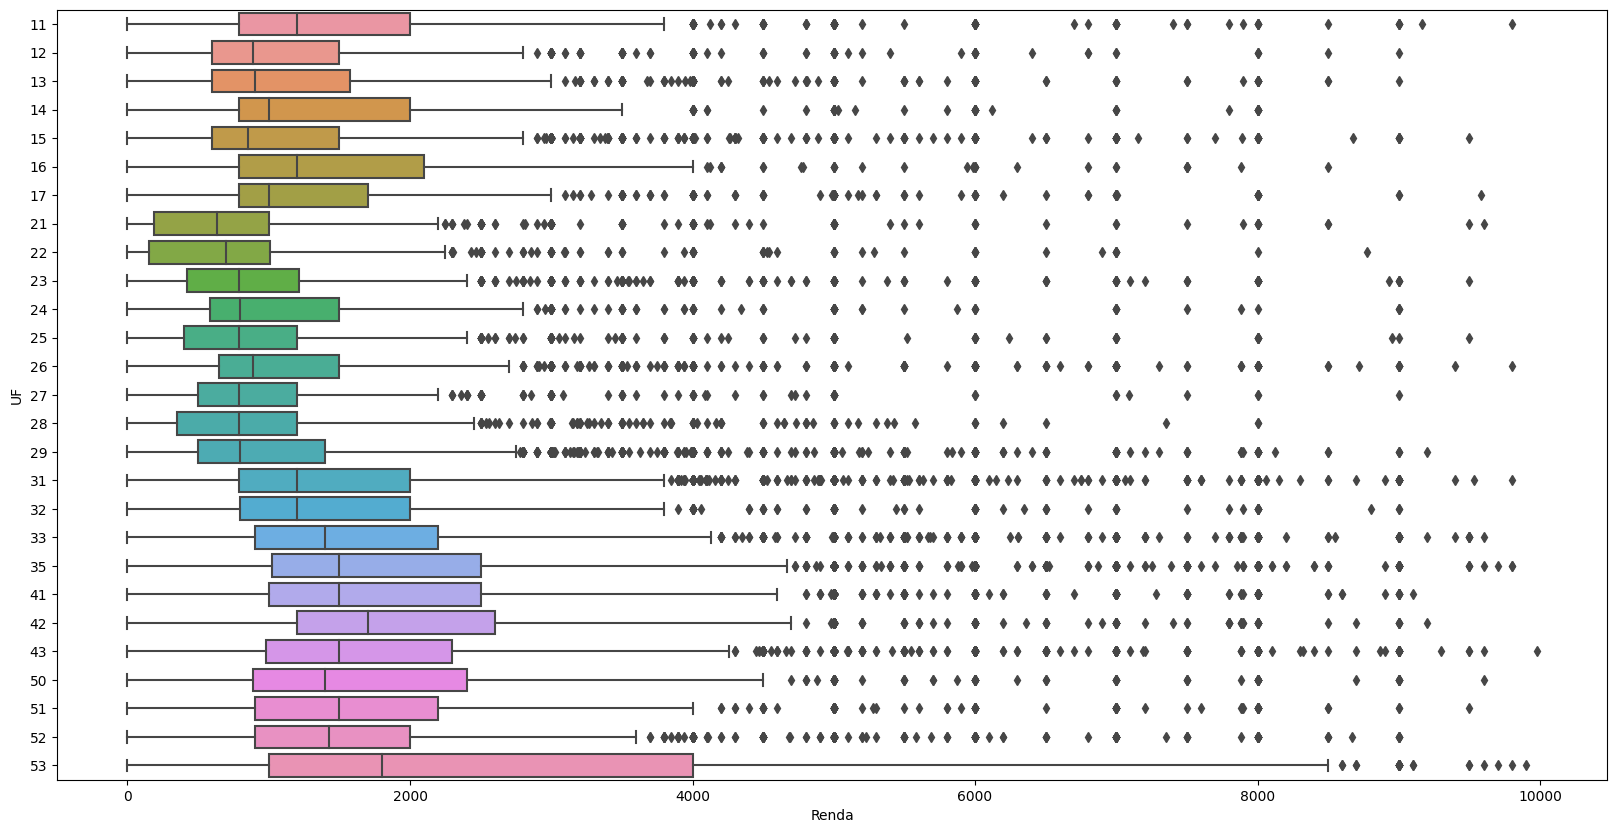

In [152]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = dados.query('Renda < 10000'), x = 'Renda', y = 'UF', orient= 'h')

> ### Conclusões

Escreva suas conclusões aqui...